In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the data

In [2]:
df=pd.read_csv('dirty_data.csv')
df.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,22/06/2019,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,29/12/2019,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,02/03/2019,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,12/01/2019,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,28/11/2019,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


In [3]:
df.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,distance_to_nearest_warehouse
count,498.000000,496.000000,500.000000,500.000000,500.000000,500.000000
mean,25585.387550,76.679819,-35.835234,144.969494,10.890000,2.204224
std,86501.420493,14.529621,12.045393,0.022720,8.649134,8.812416
min,585.000000,46.350000,-37.827123,144.924967,0.000000,0.107800
25%,7050.000000,65.892500,-37.818222,144.953488,5.000000,0.751425
50%,12865.000000,76.335000,-37.812165,144.965357,10.000000,1.030100
75%,20360.000000,82.817500,-37.805364,144.983985,15.000000,1.408625
max,947691.000000,114.040000,37.826339,145.019837,25.000000,94.973400


In [4]:
df.columns

Index(['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart',
       'order_price', 'delivery_charges', 'customer_lat', 'customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer'],
      dtype='object')

In [5]:
df.shape

(500, 16)

In [6]:
#to check null values
df.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      2
delivery_charges                 4
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                4
dtype: int64

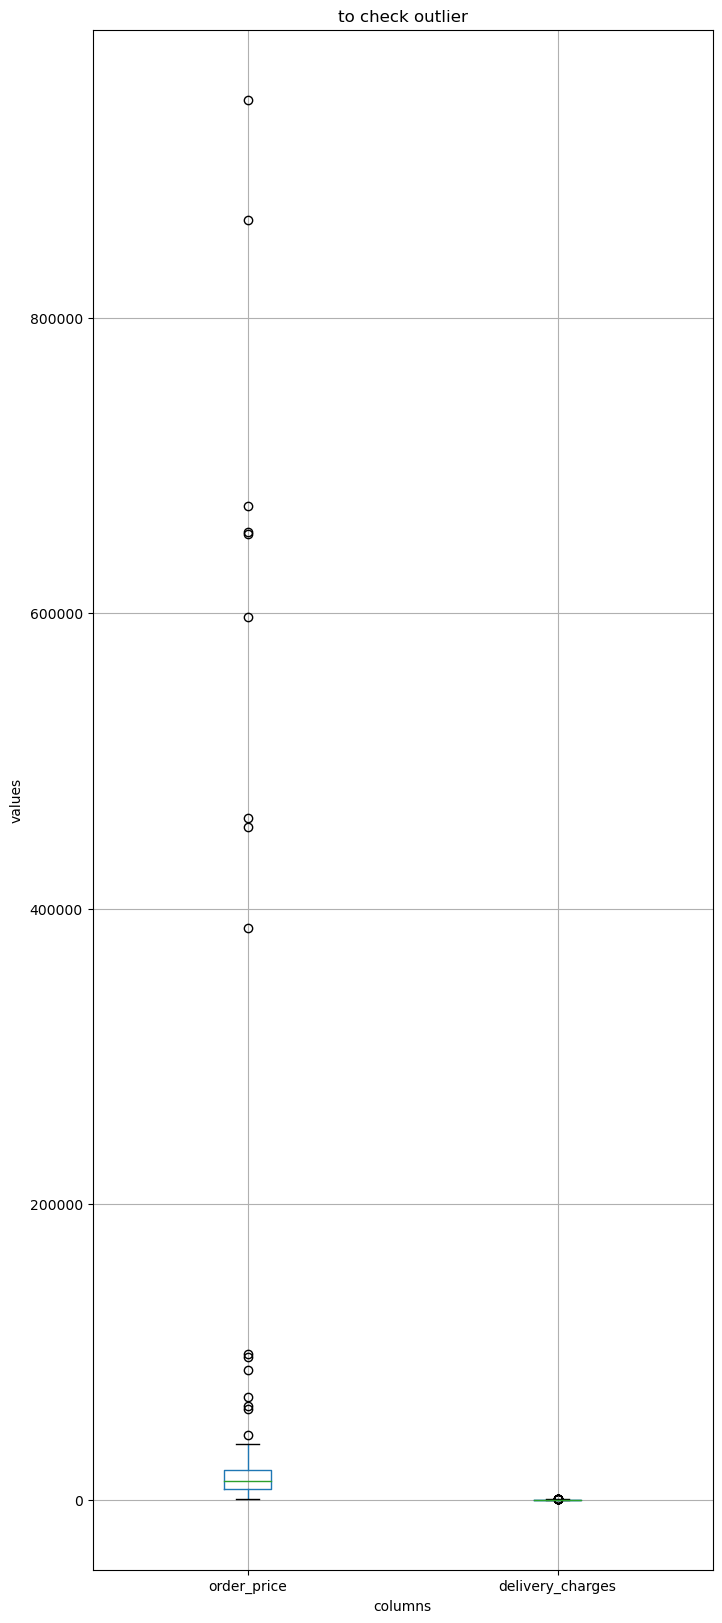

In [7]:
plt.figure(figsize=(8,20))
df.boxplot(column=['order_price','delivery_charges'])
plt.title("to check outlier")
plt.xlabel("columns")
plt.ylabel("values")
plt.show()

In [8]:
df['delivery_charges'].fillna(df['delivery_charges'].mean(), inplace=True) # because no outlier and in normal distribution

In [9]:
df['order_price'].fillna(df['order_price'].median(), inplace=True)

In [10]:
df['is_happy_customer'].fillna(df['is_happy_customer'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64

In [12]:
df.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                      float64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                       object
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object

In [13]:
df


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,22/06/2019,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,29/12/2019,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,02/03/2019,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,12/01/2019,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,28/11/2019,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,07/08/2019,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776.0,59.70,-37.817662,144.970405,10,20174.7,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,03-28-2019,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120.0,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,16/10/2019,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490.0,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,19/05/2019,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030.0,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


In [14]:
#Convert the column into appropriate data type
df['date']=pd.to_datetime(df['date'])
df['date']

C:\Users\admin\AppData\Local\Temp\ipykernel_5920\1793560853.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date']=pd.to_datetime(df['date'])


0     2019-06-22
1     2019-12-29
2     2019-02-03
3     2019-12-01
4     2019-11-28
         ...    
495   2019-07-08
496   2019-03-28
497   2019-10-16
498   2019-05-19
499   2019-05-25
Name: date, Length: 500, dtype: datetime64[ns]

In [15]:
df.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-02-03,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-12-01,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


In [16]:
df.dtypes

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                             float64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                              object
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
dtype: object

In [17]:
# to check all the columns values are unique

if df['order_id'].is_unique:
    print("orderid is unique")
else:
    print("orderid is not unique")

orderid is unique


In [18]:
if df['nearest_warehouse'].is_unique:
    print("nearestwarehouse is unique")
else:
    print("not unique")

not unique


In [19]:
df['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson',
       'Thompson911', '1211Bakers', 'Nick123olson'], dtype=object)

Using Regular Expression to clean the data

In [20]:
pattern='\d+'
masked=df['nearest_warehouse'].str.contains(pattern, regex=True)
result=df[masked]
result

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
426,ORD057375,ID0710001161,2019-03-02,Thompson911,"[('Thunder line', 1), ('Alcon 10', 1), ('Candl...",18460.0,93.52,-37.813736,144.936811,25,665085.66,Summer,True,0.9098,best buy i've made on digico functions properl...,True
467,ORD144784,ID0333901582,2019-09-11,1211Bakers,"[('Olivia x460', 2), ('Lucent 330S', 2)]",4910.0,108.87,-37.801844,144.981358,25,3791.37,Autumn,True,1.5207,turned our old tv into a smart tv. really easy...,True
494,ORD379700,ID2190564628,2019-05-08,Nick123olson,"[('Candle Inferno', 1), ('Alcon 10', 1), ('Luc...",17510.0,75.37,-37.816209,144.964057,5,16709.87,Winter,True,0.5513,"good quality price ratio bought it for my mom,...",True


In [21]:
df['nearest_warehouse']=df['nearest_warehouse'].str.replace('\d+','')
df['nearest_warehouse']

C:\Users\admin\AppData\Local\Temp\ipykernel_5920\222263010.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['nearest_warehouse']=df['nearest_warehouse'].str.replace('\d+','')


0       Thompson
1       Thompson
2      Nickolson
3      Nickolson
4      Nickolson
         ...    
495    Nickolson
496    Nickolson
497    Nickolson
498    Nickolson
499       Bakers
Name: nearest_warehouse, Length: 500, dtype: object

In [22]:
pattern='\d+'
masked=df['nearest_warehouse'].str.contains(pattern, regex=True)
result=df[masked]
result

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer


In [23]:
if df['order_total'].is_unique:
    print("order_total is unique")
else:
    print("not unique")

not unique


In [24]:
pattern='[a-zA-Z\w]'
masked=df['order_total'].str.contains(pattern, regex=True)
result=df[masked]
result

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-02-03,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-12-01,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-07-08,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776.0,59.70,-37.817662,144.970405,10,20174.7,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120.0,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490.0,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030.0,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


In [25]:
df['order_total']=df['order_total'].str.replace('[^0-9.]','')
df['order_total']

C:\Users\admin\AppData\Local\Temp\ipykernel_5920\2900460403.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['order_total']=df['order_total'].str.replace('[^0-9.]','')


0      11059.89
1       9142.71
2       9668.87
3      21137.61
4       6934.29
         ...   
495     20174.7
496    22182.29
497    16596.98
498     4606.89
499    19079.12
Name: order_total, Length: 500, dtype: object

In [26]:
pattern='[a-zA-Z\w]'
masked=df['order_total'].str.contains(pattern, regex=True)
result=df[masked]
result

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-02-03,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-12-01,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-07-08,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776.0,59.70,-37.817662,144.970405,10,20174.7,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120.0,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490.0,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030.0,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


In [27]:
df.order_total=df.order_total.astype('float64')

In [28]:
df.dtypes

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                             float64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                             float64
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
dtype: object

In [29]:
sum(df['order_total'])

19606261.840000015

In [30]:
df.nearest_warehouse.unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

In [31]:
df['nearest_warehouse']=df.nearest_warehouse.str.title()

In [32]:
df.nearest_warehouse.unique()

array(['Thompson', 'Nickolson', 'Bakers'], dtype=object)

In [36]:
warehouses=df.nearest_warehouse.value_counts()

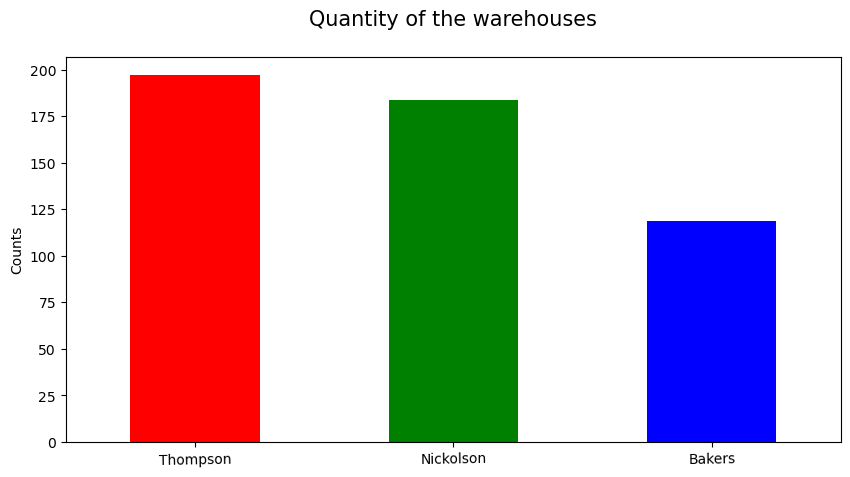

In [38]:
#visualize the unique of warehouse using bar chart
warehouses.plot(kind='bar',rot=1,color =['r','g','b'],figsize=(10,5))
plt.title("Quantity of the warehouses\n", size=15)
plt.ylabel("Counts");

### Analyzing order_price and order_total

In [40]:
df[df.order_price==df.order_price.max()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
335,ORD116440,ID0332546017,2019-12-31,Thompson,"[('Lucent 330S', 1), ('iAssist Line', 1), ('Ca...",947691.0,90.82,-37.809368,144.949342,10,9266.32,Summer,True,0.4187,work fine great product and no issues.,True


In [41]:
df[df.order_price==df.order_price.min()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
308,ORD165713,ID2384157684,2019-11-23,Bakers,"[('iStream', 2), ('Candle Inferno', 1)]",585.0,91.79,-37.800798,145.005428,25,639.29,Spring,True,1.361,junk had this thing for less than 2 months. ha...,False


In [43]:
df.loc[:,['order_price','delivery_charges','coupon_discount','order_total']].head(10)

,order_price,delivery_charges,coupon_discount,order_total
0,12200.0,79.89,10,11059.89
1,9080.0,62.71,0,9142.71
2,10670.0,65.87,10,9668.87
3,24800.0,57.61,15,21137.61
4,9145.0,75.54,25,6934.29
5,7810.0,71.22,10,7100.22
6,13700.0,74.84,5,13089.84
7,7960.0,52.28,5,10789.79
8,25390.0,107.58,10,22958.58
9,13320.0,62.26,15,11384.26


In [44]:
(10670.0 - ((10670.0 * 10)/100)+65.87)

9668.87

In [52]:
for i,index in enumerate(range(0,10)):
    if df['coupon_discount'][i]!=0:
        dis_val=(df['order_price'][i]-(df['order_price'][i]*df['coupon_discount'][i])/100) +df['delivery_charges'][i]
        final_price=np.round(dis_val,2)
    else:
        dis_val=(df['order_price'][i]+df['delivery_charges'][i])
        final_price=np.round(dis_val,2)   
                 
    print(f'order total at record of index{index} is:{final_price}')                 

order total at record of index0 is:11059.89
order total at record of index1 is:9142.71
order total at record of index2 is:9668.87
order total at record of index3 is:21137.61
order total at record of index4 is:6934.29
order total at record of index5 is:7100.22
order total at record of index6 is:13089.84
order total at record of index7 is:7614.28
order total at record of index8 is:22958.58
order total at record of index9 is:11384.26


In [56]:
listt=[]
for i in range(0,len(df['order_price'])):
    if df['coupon_discount'][i]!=0:
        dis_val=(df['order_price'][i]-(df['order_price'][i]*df['coupon_discount'][i])/100) +df['delivery_charges'][i]
        final_price=np.round(dis_val,2)
        listt.append(final_price)
    else:
        dis_val=(df['order_price'][i]+df['delivery_charges'][i])
        final_price=np.round(dis_val,2) 
        listt.append(final_price)
                 
    print(f'order total at record of index{index} is:{final_price}')

order total at record of index9 is:11059.89
order total at record of index9 is:9142.71
order total at record of index9 is:9668.87
order total at record of index9 is:21137.61
order total at record of index9 is:6934.29
order total at record of index9 is:7100.22
order total at record of index9 is:13089.84
order total at record of index9 is:7614.28
order total at record of index9 is:22958.58
order total at record of index9 is:11384.26
order total at record of index9 is:31973.25
order total at record of index9 is:10464.79
order total at record of index9 is:19104.75
order total at record of index9 is:19785.64
order total at record of index9 is:31979.78
order total at record of index9 is:15196.35
order total at record of index9 is:11188.19
order total at record of index9 is:1304.52
order total at record of index9 is:6268.89
order total at record of index9 is:6294.86
order total at record of index9 is:13787.61
order total at record of index9 is:4826.68
order total at record of index9 is:17111.

In [58]:
len(listt)

500

In [59]:
df['order_total']=pd.Series(listt)

In [62]:
q1_quantile=df['order_total'].quantile(0.25) # lowerquantile
q3_quantile=df['order_total'].quantile(0.75) # upperquantile
print("q1 ", q1_quantile)
print("q2 ", q3_quantile)

q1  6388.34
q2  17926.88


In [65]:
IQR = q3_quantile - q1_quantile
IQR

11538.54

In [67]:
lower_limit_q = q1_quantile -1.5*IQR
upper_limit_q = q3_quantile +1.5*IQR
print(lower_limit_q)
print(upper_limit_q)

-10919.470000000001
35234.69


In [73]:
checkoutlier = df[(df['order_price'] < lower_limit_q) | (df['order_price']  >upper_limit_q)]
checkoutlier

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
55,ORD442452,ID0582560124,2019-08-26,Nickolson,"[('Alcon 10', 2), ('Toshika 750', 2), ('pearTV...",43520.0,62.93,-37.822185,144.978657,5,41406.93,Winter,True,0.8949,was not described accurately phone was labeled...,False
61,ORD028755,ID0283255338,2019-06-13,Bakers,"[('iAssist Line', 2), ('pearTV', 2), ('Thunder...",37150.0,65.32,-37.803982,145.007587,0,37215.32,Winter,True,1.2762,i order google pixel 2xl and it's come google ...,False
67,ORD158007,ID3106293373,2019-02-22,Thompson,"[('iStream', 1), ('Olivia x460', 1), ('Alcon 1...",61619.0,79.39,-37.806607,144.932452,15,52455.54,Summer,False,1.4520,mom loves it i bought this for my mom and she ...,True
70,ORD122655,ID1725216621,2019-06-28,Thompson,"[('Universe Note', 2), ('Thunder line', 1), ('...",655164.0,81.70,-37.804091,144.961911,10,589729.30,Winter,True,1.6176,five stars excellent phone! i do not understan...,True
156,ORD127141,ID0777789266,2019-03-02,Thompson,"[('Lucent 330S', 2), ('pearTV', 1), ('iAssist ...",69685.0,92.70,-37.806827,144.954899,0,69777.70,Summer,True,0.9475,remarkable phone with an unbeatable price. rem...,True
237,ORD420200,ID2189162941,2019-06-12,Thompson,"[('Alcon 10', 1), ('Olivia x460', 1), ('pearTV...",865916.0,92.90,-37.811745,144.956404,15,736121.50,Summer,True,0.8274,five stars great phone,True
289,ORD339649,ID2207661056,2019-08-16,Thompson,"[('Alcon 10', 1), ('Thunder line', 2), ('Unive...",597240.0,79.91,-37.801295,144.945787,5,567457.91,Winter,True,1.2716,this was bought to replace my old candle with ...,True
299,ORD379975,ID0144730304,2019-01-13,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1)]",96385.0,77.51,-37.819260,144.957538,25,72366.26,Summer,False,1.0590,good quality great price,True
307,ORD346356,ID0312718298,2019-02-10,Thompson,"[('Candle Inferno', 1), ('Thunder line', 2), (...",63500.0,107.18,-37.803331,144.959131,25,47732.18,Spring,True,1.4855,five stars love phone,True
313,ORD496181,ID0781107765,2019-09-20,Bakers,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",461736.0,87.31,-37.818497,145.015417,25,346389.31,Spring,False,2.0115,so good. have not had time to use it much so f...,True


In [74]:
checkoutlier.shape[0]

18

In [75]:
checkoutlierwithout = df[(df['order_price'] > lower_limit_q) & (df['order_price']  <upper_limit_q)]
checkoutlierwithout

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-02-03,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-12-01,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,ORD379700,ID2190564628,2019-05-08,Nickolson,"[('Candle Inferno', 1), ('Alcon 10', 1), ('Luc...",17510.0,75.37,-37.816209,144.964057,5,16709.87,Winter,True,0.5513,"good quality price ratio bought it for my mom,...",True
496,ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120.0,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490.0,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030.0,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


In [79]:
checkoutlierwithout.shape[0]

482

In [81]:
checkoutlierwithout['is_happy_customer'].unique()
satisfaction=checkoutlierwithout['is_happy_customer'].value_counts()
satisfaction

True     345
False    137
Name: is_happy_customer, dtype: int64

Text(0.5, 1.0, 'Customer satisfaction Vs Not satisfaction\n')

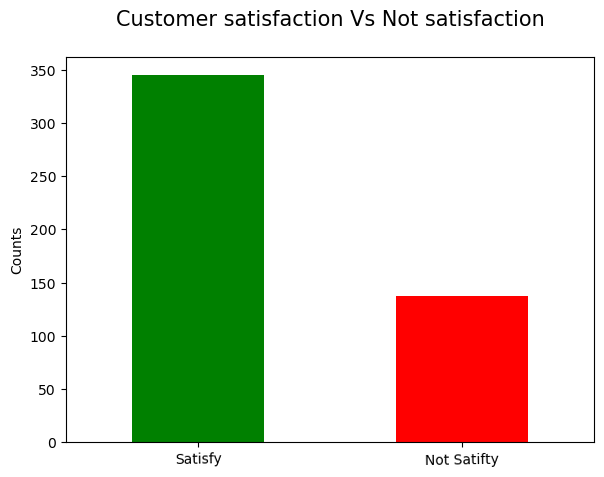

In [82]:
plt.figure(figsize=(15,5))

plt.subplot(121)
satisfaction.plot(kind='bar', color=['g','r'], rot=1)
plt.xticks(range(2), labels=['Satisfy','Not Satifty'])
plt.ylabel('Counts')
plt.title("Customer satisfaction Vs Not satisfaction\n", size=15)